Part 1.                    **General Labor Force Participation Rate**


In this part i want to analyze general insights about this dataset which include:

How has the labor force participation rate?

Are there notable differences between male and female participation?

Which age groups contribute the most to the labor force?

How does education level impact labor force participation?


Add dataset with necessray imports and review.

In [2]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = "main_dataset_q4.xls"

df = pd.read_excel(file_path, sheet_name='2.1.') #read labor force sheet
df.head



<bound method NDFrame.head of                                         2. Labor force Unnamed: 1  \
0    2.1 Population by labor force participation st...        NaN   
1                                               people              
2                                                  NaN    Total\n   
3                                                  NaN        NaN   
4                                                  NaN        NaN   
..                                                 ...        ...   
101                                              29-34     364089   
102                                              35-44     483758   
103                                              45-54     414706   
104                                              55-64     363791   
105                                       65 and older     384799   

                           Unnamed: 2             Unnamed: 3  \
0                                 NaN                    NaN   
1            

Here we have uncleaned data that be very hard to read and do further work so we need do clean and remove some rows

In [5]:
# Load and clean '2.1.' sheet

file_path = "main_dataset_q4.xls"
df_21 = pd.read_excel(file_path, sheet_name='2.1.', skiprows=5) 

df_21.columns = df_21.iloc[0].values  
df_21 = df_21[1:].reset_index(drop=True)

df_21.head(10)


,All population\n,NaN,NaN,NaN,NaN,NaN
0,All population,14148747.0,9645294,9197046,448248,4503453.0
1,"including age, years:",NaN,NaN,NaN,NaN,NaN
2,15,144815.0,45,45,-,144770.0
3,16-24,2223180.0,956868,920166,36702,1266312.0
4,25-28,911821.0,816660,795832,20828,95161.0
5,29-34,2118362.0,1964927,1900801,64126,153435.0
6,35-44,3008950.0,2777723,2617372,160351,231227.0
7,45-54,2058123.0,1882181,1785626,96555,175942.0
8,55-64,1724842.0,1154920,1085234,69686,569922.0
9,65 and older,1958654.0,91970,91970,-,1866684.0


In [ ]:
df_21.columns = ["Category", "Total Population", "Labor Force", "Employed", "Unemployed", "Not in Labor Force"]

total_population = df_21.iloc[0]["Total Population"]
labor_force = df_21.iloc[0]["Labor Force"]
participation_rate = (labor_force / total_population) * 100



male_participation = (df_21.iloc[11]["Labor Force"] / df_21.iloc[0]["Labor Force"]) * 100
female_participation = (df_21.iloc[22]["Labor Force"] / df_21.iloc[0]["Labor Force"]) * 100

age_groups = df_21.iloc[3:10][["Category", "Labor Force"]].dropna()  

most_age = (df_21.iloc[6]["Labor Force"]/ df_21.iloc[0]["Labor Force"]) *100

most_age, male_participation, female_participation, 

(28.798738535082496, 51.60258463868493, 48.39741536131506, 68.17065850424775)

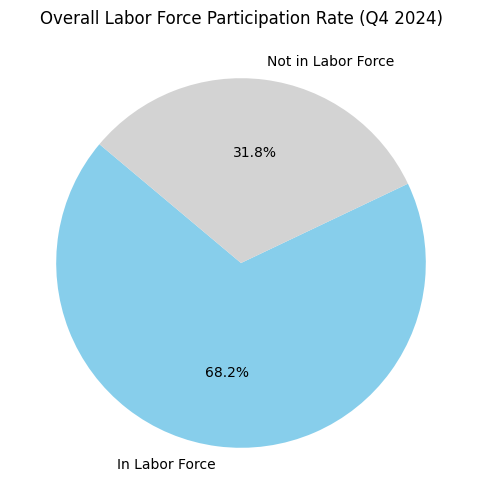

In [6]:
plt.figure(figsize=(6, 6))
plt.pie([participation_rate, 100 - participation_rate], labels=["In Labor Force", "Not in Labor Force"],
        autopct='%1.1f%%', colors=["skyblue", "lightgray"], startangle=140)
plt.title("Overall Labor Force Participation Rate (Q4 2024)")
plt.show()

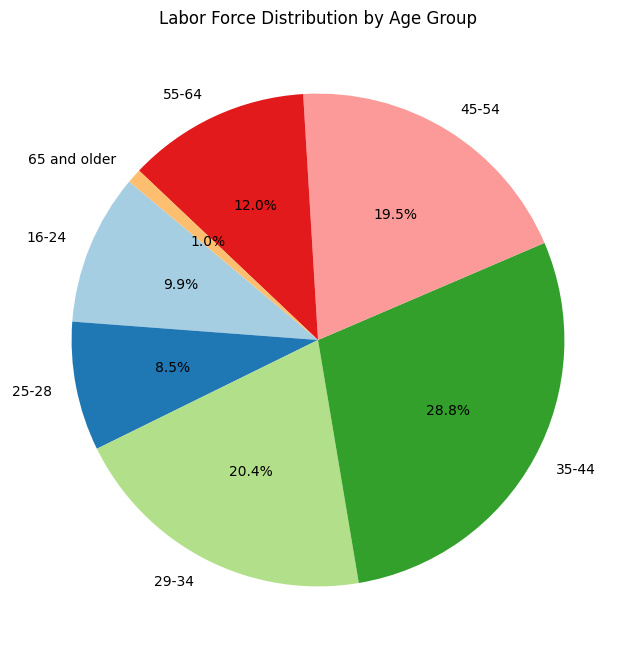

In [7]:
age_groups = df_21.iloc[3:10][["Category", "Labor Force"]].dropna()
labels = age_groups["Category"]
sizes = age_groups["Labor Force"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Labor Force Distribution by Age Group")
plt.show()

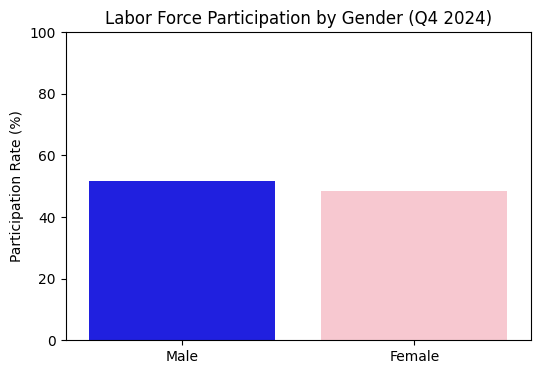

In [8]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x=["Male", "Female"], 
    y=[male_participation, 
    female_participation], hue =["Male", "Female"], 
    palette=["blue", "pink"]
    )
plt.ylabel("Participation Rate (%)")
plt.title("Labor Force Participation by Gender (Q4 2024)")
plt.ylim(0, 100)
plt.show()

In [9]:
file_path = "main_dataset_q4.xls"
df_22 = pd.read_excel(file_path, sheet_name='2.2', skiprows=5) 

df_22.columns = df_22.iloc[0].values  
df_22 = df_22[1:].reset_index(drop=True)

df_edu = df_22.iloc[:, :3]  
df_edu.columns = ["Education Level", "Labor Force", "Employed Population"]

df_edu["Labor Force"] = pd.to_numeric(df_edu["Labor Force"], errors="coerce")
df_edu["Employed Population"] = pd.to_numeric(df_edu["Employed Population"], errors="coerce")

df_edu = df_edu.dropna()

df_edu


,Education Level,Labor Force,Employed Population
0,higher and postgraduate education,4749601.0,4072968.0
1,technical and vocational education,2298391.0,2015419.0
2,secondary vocational (special) education,4214802.0,2788666.0
3,initial vocational education,323224.0,196830.0
4,secondary general education,2055326.0,540147.0
...,...,...,...
76,secondary vocational (special) education,780015.0,500833.0
77,initial vocational education,70262.0,43389.0
78,secondary general education,539379.0,186176.0
79,basic secondary education,100324.0,8231.0


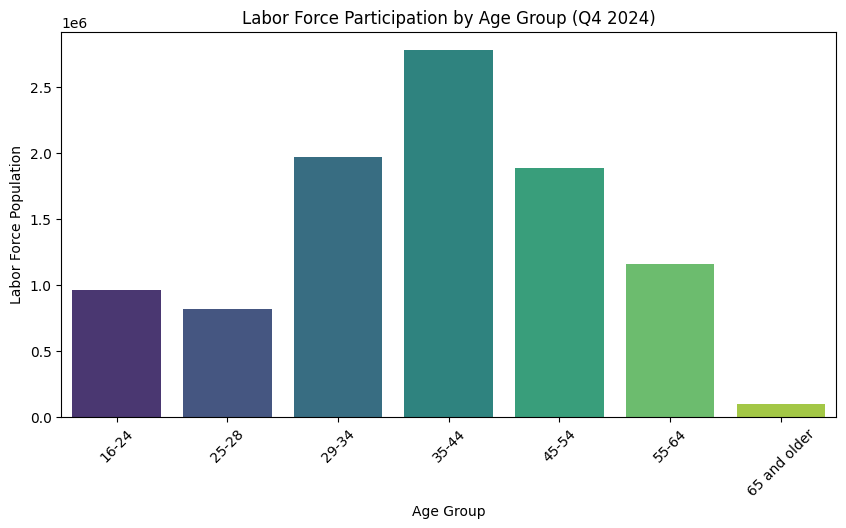

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=age_groups["Category"],
    y=age_groups["Labor Force"],
    hue = age_groups["Category"],
    palette="viridis",
    legend=False            

    )
plt.xlabel("Age Group")
plt.ylabel("Labor Force Population")
plt.title("Labor Force Participation by Age Group (Q4 2024)")
plt.xticks(rotation=45)
plt.show()

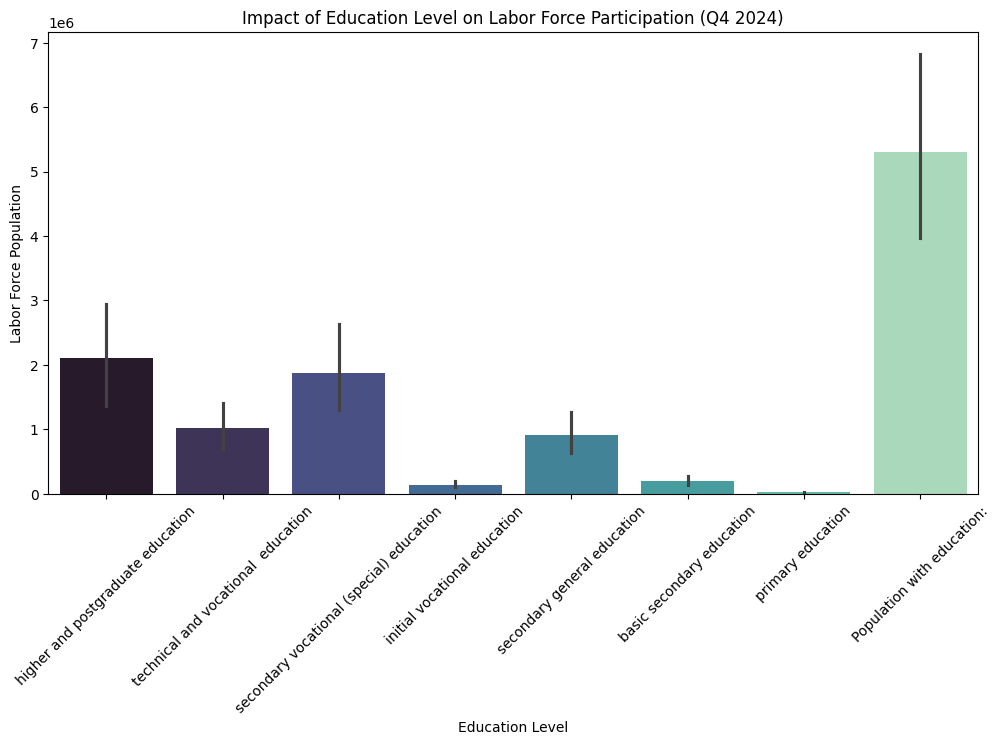

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Education Level", 
    y="Labor Force", 
    hue="Education Level", 
    data=df_edu, 
    palette="mako", 
    legend=False            
)
plt.xlabel("Education Level")
plt.ylabel("Labor Force Population")
plt.title("Impact of Education Level on Labor Force Participation (Q4 2024)")
plt.xticks(rotation=45)
plt.show()

Additional comparisoion of quarter 4 and quarter 3 to see how labor force changed and take out some insights

In [12]:
file_path3 = "additional_dataset_q3.xls"

df = pd.read_excel(file_path3, sheet_name='2.1.', skiprows=5) 
df.head

df.columns = df.iloc[0].values  
df = df[1:].reset_index(drop=True)

df.head(10)






,All population\n,NaN,NaN,NaN,NaN,NaN
0,All population,14161532.0,9682380,9233828,448552,4479152.0
1,"including age, years:",NaN,NaN,NaN,NaN,NaN
2,15,160795.0,140,140,-,160655.0
3,16-24,2273090.0,1038378,999031,39347,1234712.0
4,25-28,957555.0,862464,834907,27557,95091.0
5,29-34,2014320.0,1879364,1828492,50872,134956.0
6,35-44,2913043.0,2689556,2540738,148818,223487.0
7,45-54,2156959.0,1971035,1871375,99660,185924.0
8,55-64,1744950.0,1124066,1041781,82285,620884.0
9,65 and older,1940820.0,117377,117364,13,1823443.0


Total review of part 1:

1. We have in total 14 148 747 people total including 9 645 294 labor force and 4 503 453 persons that cant include in this list.In pie chart we can see thats 68.2 percent of labor force and 31.8 percent of not in labor in this number included persons like: Study(daytime), housekeeping, retirement, and for health reasons.

2. There is no significant gap between male and female labor force. Mans is slightly higher by 3.21 percent although total population of woman is higher.

3. Age group most contributed in labor force is middle age between 35-44 which is 28.8 percent of total labor force, second is age between 29-34.

4. Education affect shows that population with higher and postgraduate education is most likely will be employed it shows that 3 927 387 is employed and people with secondary education in second place 2 626 644 out of all labor force

5. And lastly comparing to previous quarter labor force dropped by 37086 people. Several factors can affect this like seasonal employment that decreases during winter like constructions or tourism related jobs. Also it can be economical reasons in which some companies lays off staff towards ending of year manage budget or prepare for upcoming year. Lastly it can be labor market reforms during ending of year or some people wanting change their work place.

Part 2.                            **Industry and Sector Participation**

1.What is Employed population of across different employment types

2.How does employment vary between urban and rural areas?

3.What is the overall gender distribution in employment?

4.Status and education affect on emplyment type
				


C:\Users\alizh\AppData\Local\Temp\ipykernel_4436\4046819874.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Employed", y="Category", data=df_top7, palette="viridis")


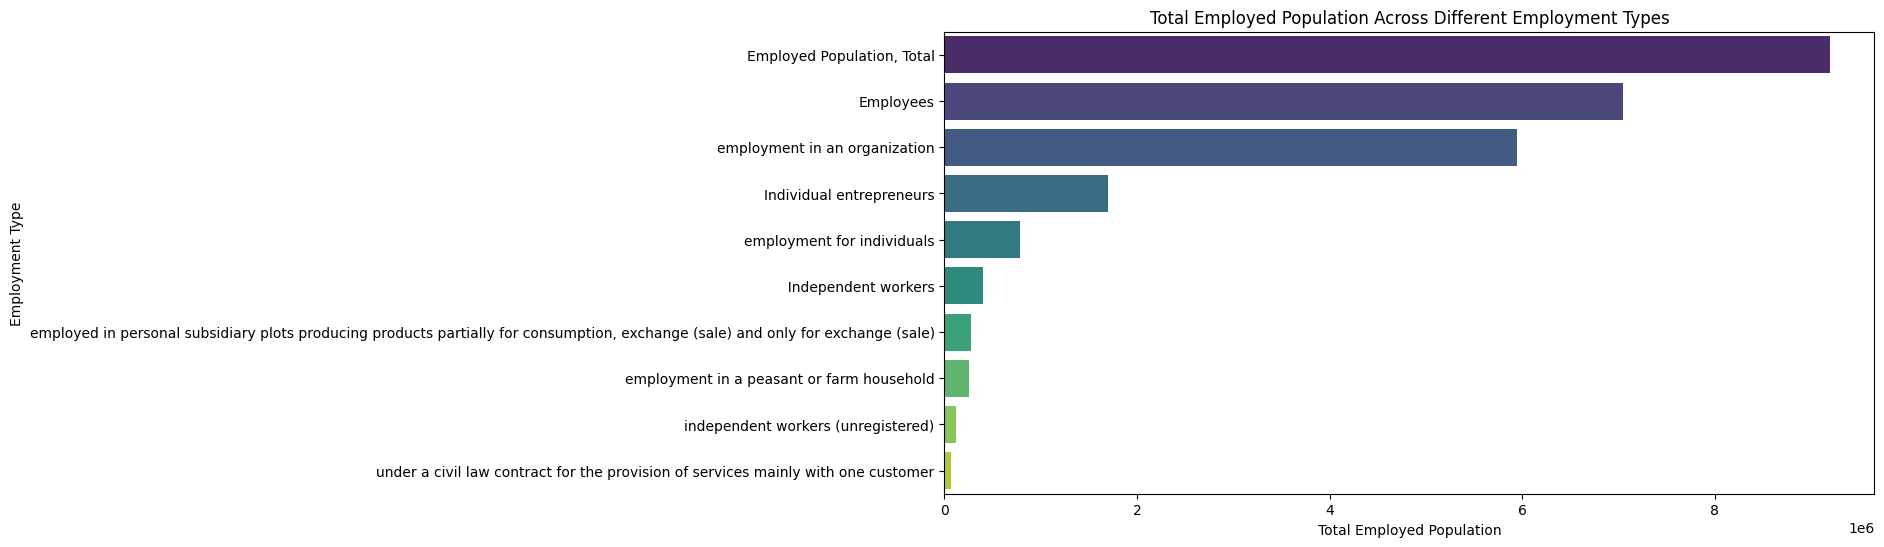

In [13]:

file_path = "main_dataset_q4.xls"
df_0 = pd.read_excel(file_path, sheet_name='3.1', skiprows=5) 

df_0.columns = df_0.iloc[0].values  
df_0 = df_0[1:].reset_index(drop=True)
df_0 = df_0.iloc[:, :-3]

df_0.columns = [ "Category", "Total Employed", "Men Employed", "Women Employed",
    "Urban Employed", "Urban Men Employed", "Urban Women Employed",
    "Rural Employed", "Rural Men Employed", "Rural Women Employed"]

numeric_cols = ["Total Employed", "Men Employed", "Women Employed",
                "Urban Employed", "Urban Men Employed", "Urban Women Employed",
                "Rural Employed", "Rural Men Employed", "Rural Women Employed"]

df_0[numeric_cols] = df_0[numeric_cols].apply(pd.to_numeric, errors="coerce")

df_0 = df_0.dropna().reset_index(drop=True)


df_top7 = df_0.nlargest(10, 'Total Employed')

plt.figure(figsize=(12, 6))
sns.barplot(x="Total Employed", y="Category", data=df_top7, palette="viridis")
plt.xlabel("Total Employed Population")
plt.ylabel("Employment Type")
plt.title("Total Employed Population Across Different Employment Types")
plt.show()








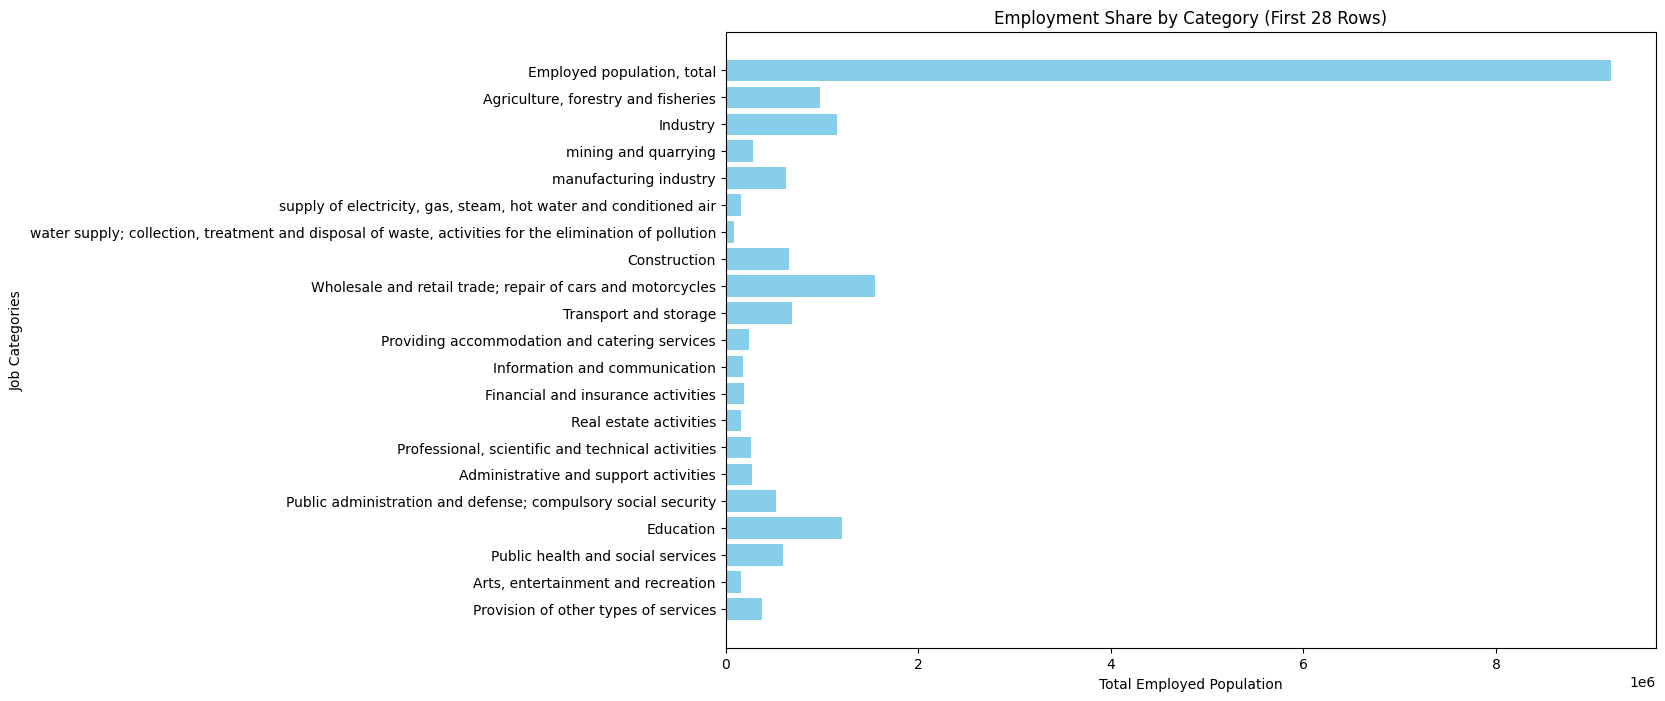

,Category,Total Employed,Men Employed,Women Employed
0,"Employed population, total",9197046.0,4766111.0,4430935.0
21,"Employed population, total",5731350.0,2878776.0,2852574.0
8,Wholesale and retail trade; repair of cars and...,1547815.0,670433.0,877382.0
17,Education,1208563.0,316957.0,891606.0
2,Industry,1154194.0,796168.0,358026.0
1,"Agriculture, forestry and fisheries",978739.0,585544.0,393195.0
23,Industry,823393.0,551496.0,271897.0
9,Transport and storage,684711.0,558907.0,125804.0
7,Construction,652947.0,539432.0,113515.0
4,manufacturing industry,625113.0,392556.0,232557.0


In [ ]:
df_35 = pd.read_excel(file_path, sheet_name='3.5', skiprows=5) 

df_35.head(20)

df_35 = df_35.iloc[:28].reset_index(drop=True)  
df_35.columns = ["Category", "Total Employed", "Men Employed", "Women Employed",
                 "Both Genders Inc", "Men Inc", "Women Inc",
                 "Both Genders Exc", "Men Exc", "Women Exc"]

df_35 = df_35[["Category", "Total Employed", "Men Employed", "Women Employed"]]

df_35[["Total Employed", "Men Employed", "Women Employed"]] = df_35[["Total Employed", "Men Employed", "Women Employed"]].apply(pd.to_numeric, errors="coerce")

df_35 = df_35.dropna().reset_index(drop=True)

df_top10_jobs = df_35.nlargest(10, "Total Employed")

df_top10_jobs


plt.figure(figsize=(12, 8))
plt.barh(df_35["Category"], df_35["Total Employed"], color="skyblue")
plt.xlabel("Total Employed Population")
plt.ylabel("Job Categories")
plt.title("Employment Share by Category (First 28 Rows)")
plt.gca().invert_yaxis()  
plt.show()

df_top10_jobs



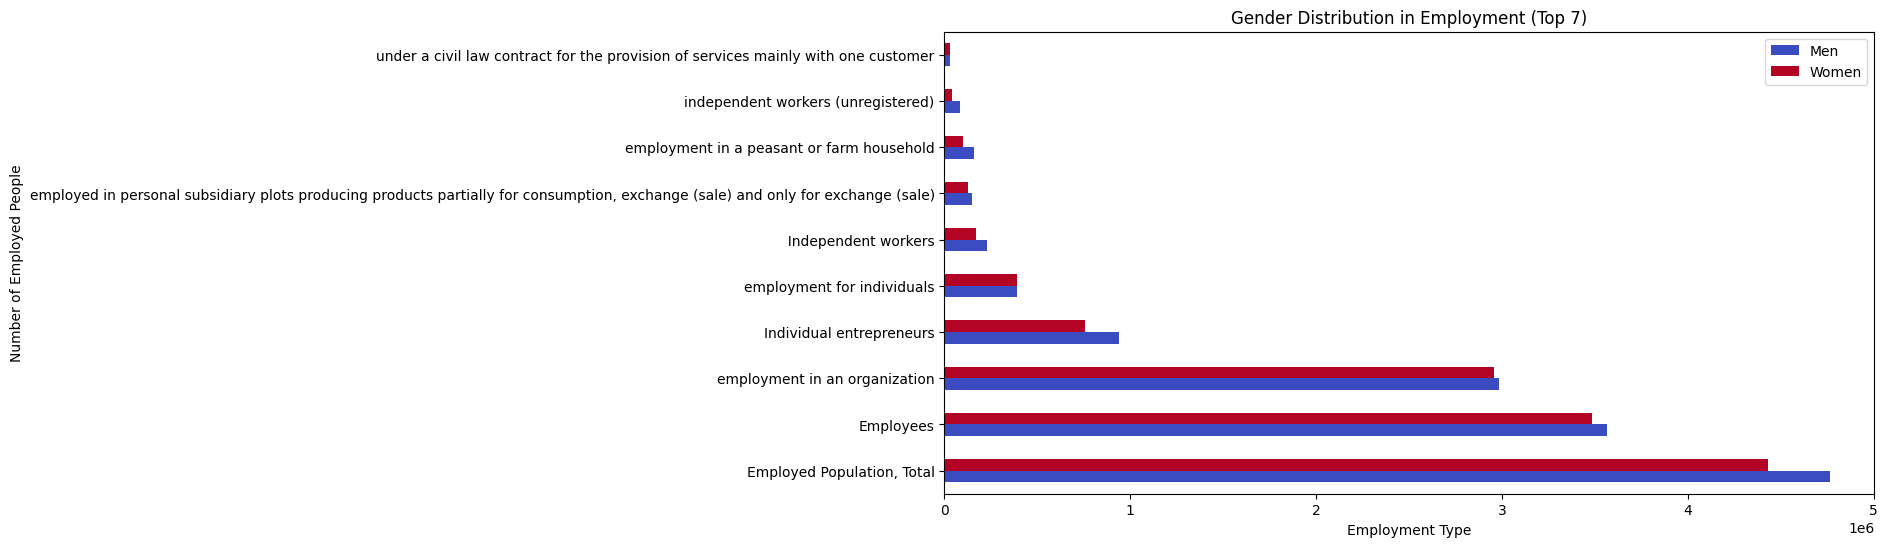

In [15]:
df_gender = df_top7[["Category", "Men Employed", "Women Employed"]]
df_gender.set_index("Category", inplace=True)

df_gender.plot(kind="barh", figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Employment Type")
plt.ylabel("Number of Employed People")
plt.title("Gender Distribution in Employment (Top 7)")
plt.legend(["Men", "Women"])
plt.show()

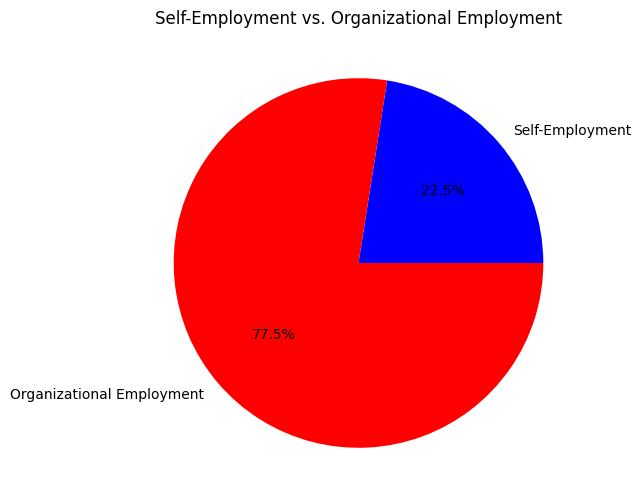

In [16]:
self_employment = df_0[df_0["Category"].str.contains("entrepreneur|private practice", case=False, na=False)]
organization_employment = df_0[df_0["Category"].str.contains("organization", case=False, na=False)]

plt.figure(figsize=(12, 6))
plt.pie([self_employment["Total Employed"].sum(), organization_employment["Total Employed"].sum()],
        labels=["Self-Employment", "Organizational Employment"], autopct='%1.1f%%', colors=["blue", "red"])
plt.title("Self-Employment vs. Organizational Employment")
plt.show()



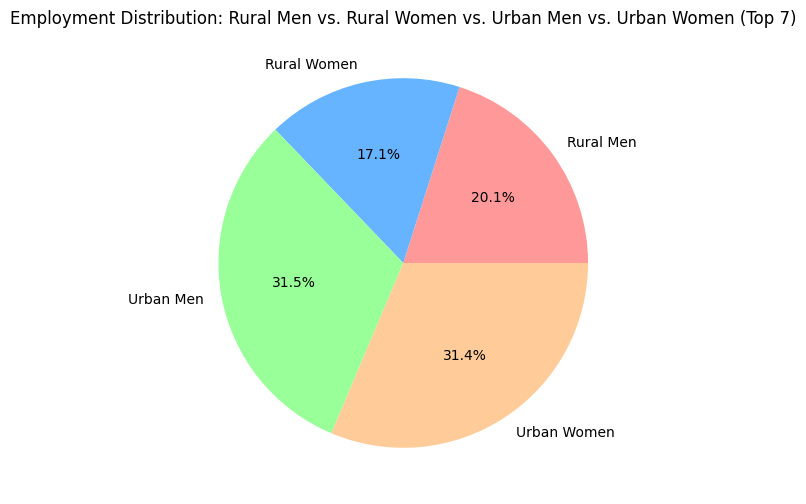

In [17]:
employment_counts = [
    df_top7["Rural Men Employed"].sum(),
    df_top7["Rural Women Employed"].sum(),
    df_top7["Urban Men Employed"].sum(),
    df_top7["Urban Women Employed"].sum()
]
labels = ["Rural Men", "Rural Women", "Urban Men", "Urban Women"]
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]

plt.figure(figsize=(12, 6))
plt.pie(employment_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Employment Distribution: Rural Men vs. Rural Women vs. Urban Men vs. Urban Women (Top 7)")
plt.show()


In [18]:
# Gender disparity analysis
df_0["Gender Disparity"] = abs(df_0["Men Employed"] - df_0["Women Employed"])
df_highest_disparity = df_0.nlargest(5, "Gender Disparity")
print("Category with Highest Gender Disparity:")
print(df_highest_disparity[["Category", "Men Employed", "Women Employed", "Gender Disparity"]])



Category with Highest Gender Disparity:
                                     Category  Men Employed  Women Employed  \
0                  Employed Population, Total     4766111.0       4430935.0   
6                    Individual entrepreneurs      938356.0        757958.0   
1                                   Employees     3563345.0       3484479.0   
11                        Independent workers      231191.0        168345.0   
4   employment in a peasant or farm household      157715.0        102728.0   

    Gender Disparity  
0           335176.0  
6           180398.0  
1            78866.0  
11           62846.0  
4            54987.0  


Review of part 2:

1. Overall in urban population of labor force its not that big difference between males and womens numbers but in rural parts of country there is slightly higher number of male workers. Its due to higher requirements of physical force and absence from home including works related with agriculture, animal farms and etc. In numbers its up to 330000 or 3% more of job employment it consist difference in "employment in a peasant or farm household -57000", "Individual entrepreneurs-180000" and "individuals of business founders- 12000" and so on.

2. Most popular type of employment its "employment in an organization - 5 943 247", second is "Individual entrepreneurs -1 696 314" and lastly "employment for individuals - 780 300" it takes huge part of labor force in Kazakhstan. As we can see organisational employment is more popular by 55% than self-employment.

3. Between rural and urban population numbers in every urban type of employemnt is higher but in sectors of independent workers and employment in a peasant or farm household rural areas is dominating as i said in first statement.

4. Here are top 10 job places

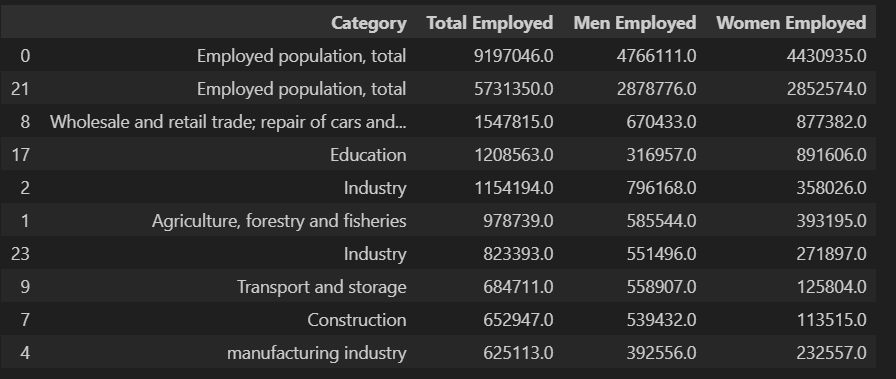

Part 3

Work time analysis:

1. Total work time of employed population analysis

2. Age group work time review and how age affects on work time

3. Analysis of employed population by the working hours numbers per week at the main job types of Kazakhstan

4. Population employed less than the established working hours analysis

In [70]:
file_path = "main_dataset_q4.xls"
df_4 = pd.read_excel(file_path, sheet_name='4.1', skiprows=5)

df_4.rename(columns={   
    df_4.columns[0]: "Category",   
    df_4.columns[1]: "Total",  
    df_4.columns[10]: "41 hours or more",  
    df_4.columns[11]: "Temporarly" ,
    df_4.columns[12]: "Without pay"  ,
    df_4.columns[13]: "Average hour"  ,
}, inplace=True)

df_4 = df_4.dropna()

work_hours_cols = df_4.columns[2:11]

mens = df_4[df_4["Category"] == "Mens, Total"][work_hours_cols]
womens = df_4[df_4["Category"] == "Womens, Total"][work_hours_cols]

comparison = pd.concat([mens.T, womens.T], axis=1)
comparison.columns = ["Mans", "Womans"]
print("Comparing mans and womans work hours")
comparison

Comparing mans and womans work hours


,Mans,Womans
5 hours or less,1622,1542
6-10 hours,15728.0,30831.0
11-15 hours,38187.0,38564.0
16-20 hours,19838.0,32614.0
21-25 hours,24617.0,34257.0
26-30 hours,57982.0,55569.0
31-35 hours,17727.0,6203.0
36-40 hours,3724072.0,3700064.0
41 hours or more,850454.0,440949.0


In [ ]:
work_hours_cols = df_4.columns[3:11]

total_work_hours = df_4.loc[df_4['Category'] == 'Employed population, Total', work_hours_cols]

total_work_hours = total_work_hours.apply(pd.to_numeric, errors='coerce')

top_5_work_hours = total_work_hours.T.sort_values(by=total_work_hours.index[0], ascending=False).head(5)

top_5_work_hours 


,0
36-40 hours,7424136.0
41 hours or more,1291403.0
26-30 hours,113551.0
11-15 hours,76751.0
21-25 hours,58874.0


In [ ]:
file_path = "main_dataset_q4.xls"
df_41 = pd.read_excel(file_path, sheet_name='4.2', skiprows=4)


df_41.rename(columns={  
    df_41.columns[0]: "Category",   
    df_41.columns[1]: "Total",  
    df_41.columns[10]: "41 hours or more",  
    df_41.columns[11]: "Temporarly" ,
    df_41.columns[12]: "Without pay"  ,
    df_41.columns[13]: "Average hour"  ,
}, inplace=True)

df_41 = df_41.dropna()

df_41 = df_41[~df_41["Category"].isin(["15", "65 age and older"])]
df_41 = df_41.drop(index=2)


top_5_age_groups = age_groups.nlargest(5, "Average hour")[["Category", "Average hour"]]

print(top_5_age_groups)







  Category  Average hour
5    29-34          40.0
6    35-44          40.0
7    45-54          40.0
3    16-24          39.0
4    25-28          39.0


Index(['Category', 'Total', '5 hours or less', ' 6-10 hours', '   11-15 hours',
       '    16-20 hours', '     21-25 hours', '     26-30 hours',
       '     31-35 hours', ' 36-40 hours', '\n41 hours or more',
       'Temporarily Unemployed', 'Without Pay', 'Average Work Hours'],
      dtype='object')


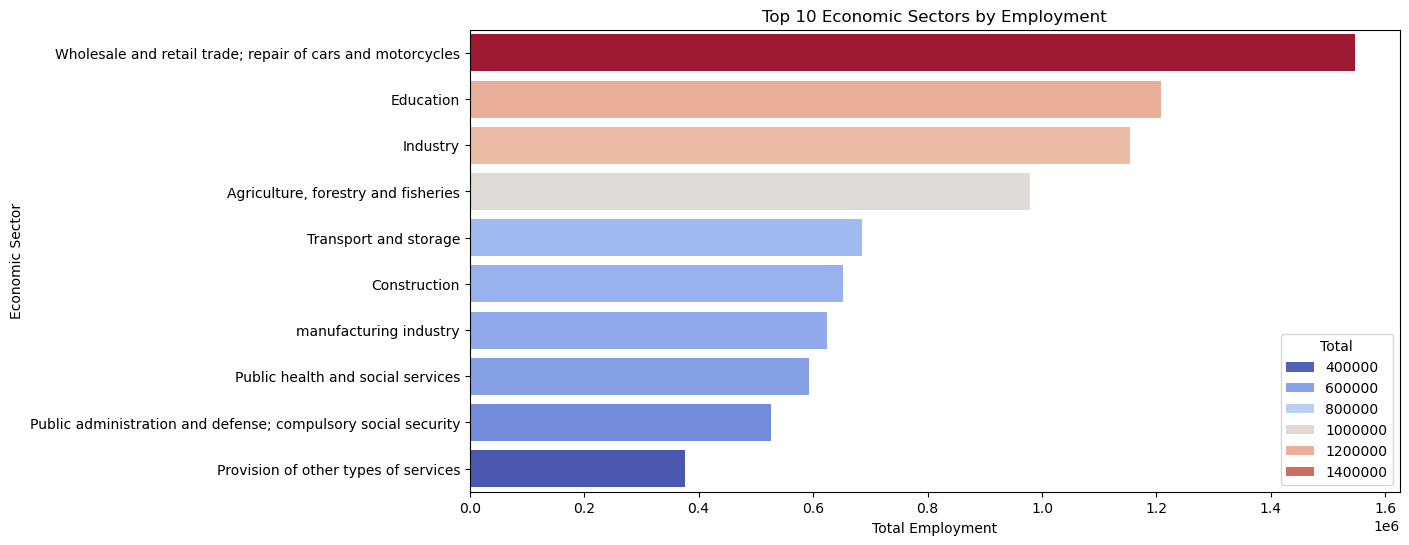

,Category,5 hours or less,6-10 hours,11-15 hours,16-20 hours,21-25 hours,26-30 hours,31-35 hours,36-40 hours,41 hours or more
2,"Agriculture, forestry and fisheries",207,42171,67567,13967,32261,47917,4567,646893.0,641540.0
3,Industry,164,143,33,221,2482,8531,2284,899004.0,883772.0
4,mining and quarrying,-,-,-,-,559,6296,1856,194383.0,192338.0
5,manufacturing industry,164,44,33,221,1648,1865,428,497400.0,484999.0
6,"supply of electricity, gas, steam, hot water a...",-,-,-,-,95,132,-,136130.0,135446.0
7,"water supply; collection, treatment and dispos...",-,99,-,-,180,238,-,71091.0,70989.0
8,Construction,400,607,38,1144,1792,5070,1800,495899.0,493435.0
9,Wholesale and retail trade; repair of cars and...,92,222,559,1524,1385,21763,2085,1199625.0,1195871.0
10,Transport and storage,-,239,627,489,1335,2780,8734,515082.0,513210.0
11,Providing accommodation and catering services,-,100,423,308,819,3741,226,188708.0,186757.0


In [84]:
file_path = "main_dataset_q4.xls"
df_44 = pd.read_excel(file_path, sheet_name='4.4', skiprows=4)

df_44.rename(columns={
    df_44.columns[0]: "Category",
    df_44.columns[1]: "Total",
    df_44.columns[11]: "Temporarily Unemployed",
    df_44.columns[12]: "Without Pay",
    df_44.columns[13]: "Average Work Hours"
}, inplace=True)

df_44 = df_44.dropna()

print(df_44.columns)


df_44 = df_44.iloc[1:]  

cols_to_numeric = ["Total", "Temporarily Unemployed", "Without Pay", "Average Work Hours"]
df_44[cols_to_numeric] = df_44[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

top_sectors = df_44.sort_values(by="Total", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_sectors, x="Total", y="Category",hue = "Total", palette="coolwarm")
plt.xlabel("Total Employment")
plt.ylabel("Economic Sector")
plt.title("Top 10 Economic Sectors by Employment")
plt.show()

df_44.columns = df_44.columns.str.strip()


work_hour_cols = ["5 hours or less", "6-10 hours", "11-15 hours", "16-20 hours", 
                  "21-25 hours", "26-30 hours", "31-35 hours", "36-40 hours", "41 hours or more"]


df_work_hours = df_44[["Category"] + work_hour_cols]
df_work_hours


/tmp/ipykernel_9443/1750494443.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x="Total Employed", y="Category", palette="viridis")


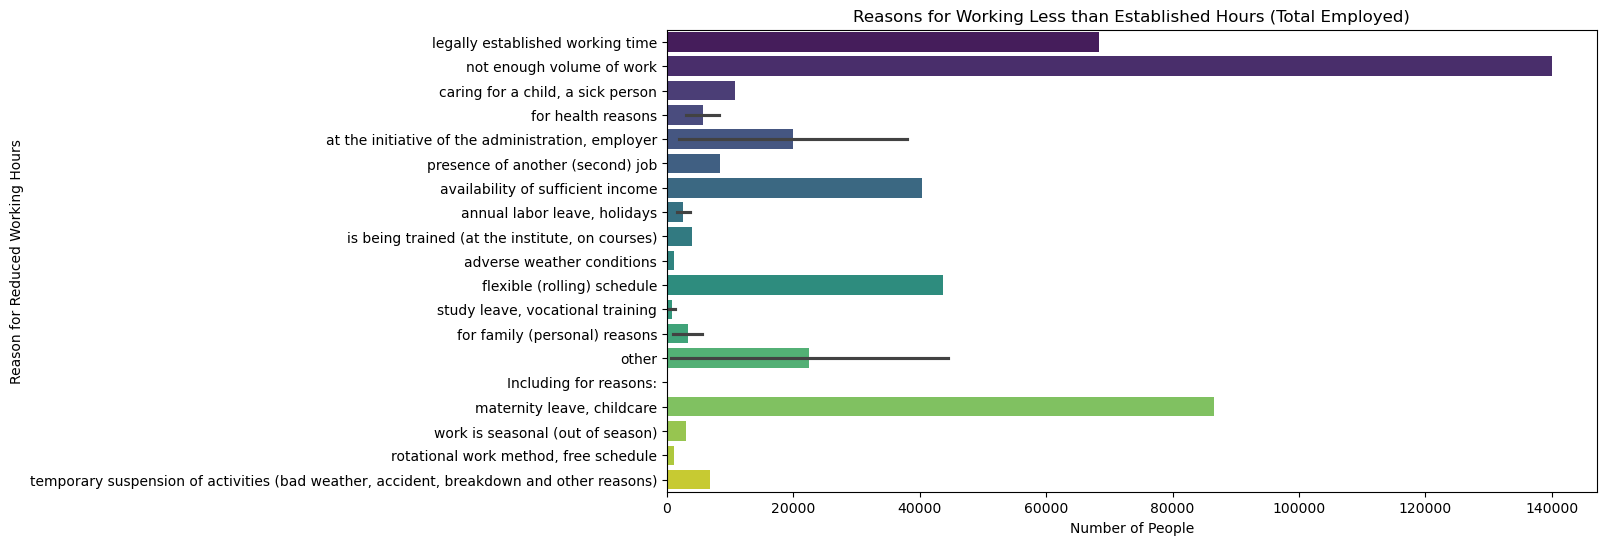

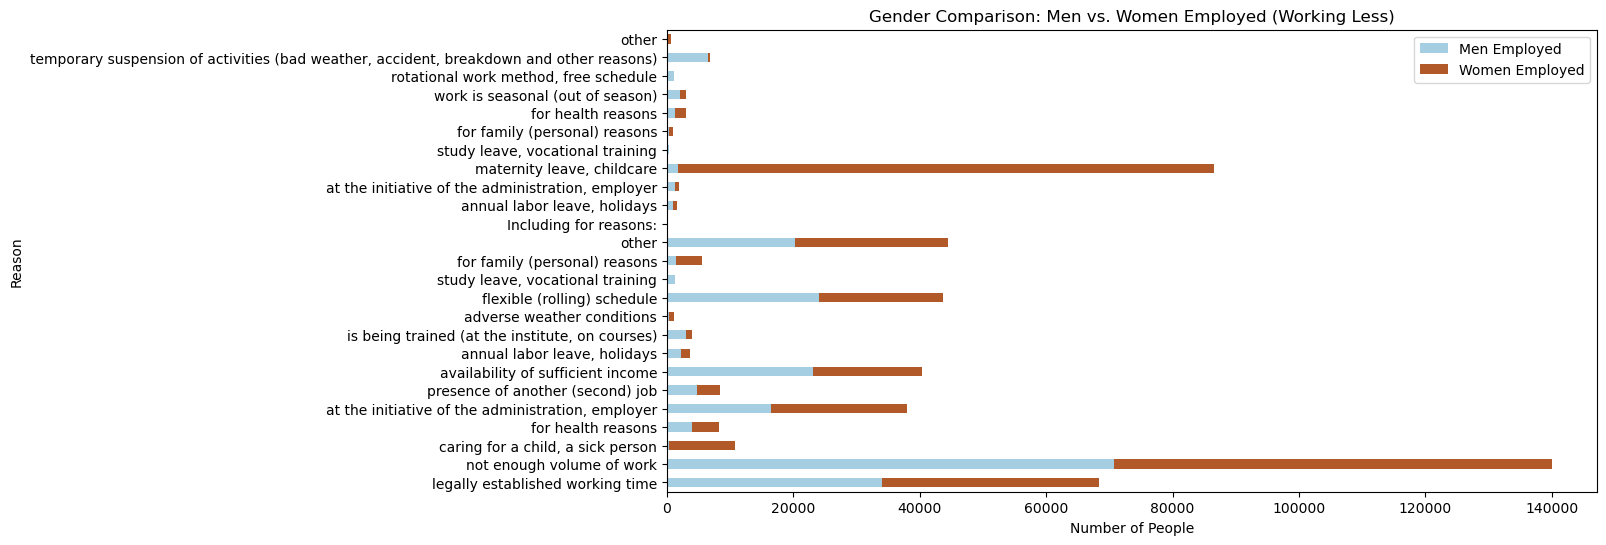

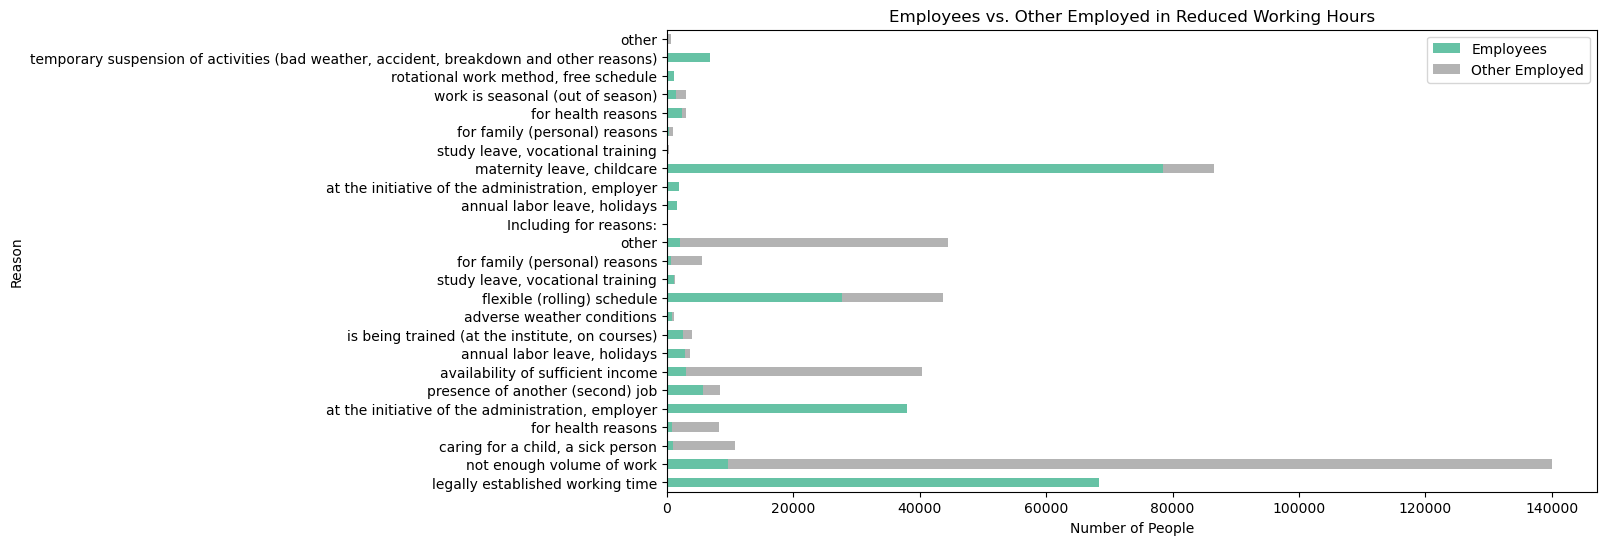

In [4]:
file_path = "main_dataset_q4.xls"
df_46 = pd.read_excel(file_path, sheet_name='4.6', skiprows=5)

df_46.columns = ["Category", "Total Employed", "Men Employed", "Women Employed",
                 "Both Genders Employees", "Men Inc", "Women Inc",
                 "Both Genders other", "Men other", "Women other"]

df_46 = df_46.drop(index=1)

numeric_cols = ["Total Employed", "Men Employed", "Women Employed",
                "Both Genders Employees", "Men Inc", "Women Inc",
                "Both Genders other", "Men other", "Women other"]

df_46[numeric_cols] = df_46[numeric_cols].replace("-", 0)
df_46[numeric_cols] = df_46[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

df_46.dropna(subset=["Total Employed"], inplace=True)

df_filtered = df_46[~df_46["Category"].str.contains("Total", case=False, na=False)]


plt.figure(figsize=(12, 6))
sns.barplot(data=df_filtered, x="Total Employed", y="Category", palette="viridis")
plt.xlabel("Number of People")
plt.ylabel("Reason for Reduced Working Hours")
plt.title("Reasons for Working Less than Established Hours (Total Employed)")
plt.show()

df_gender = df_filtered[["Category", "Men Employed", "Women Employed"]].set_index("Category")
df_gender.plot(kind="barh", stacked=True, figsize=(12, 6), colormap="Paired")
plt.xlabel("Number of People")
plt.ylabel("Reason")
plt.title("Gender Comparison: Men vs. Women Employed (Working Less)")
plt.legend(["Men Employed", "Women Employed"])
plt.show()

df_emp_other = df_filtered[["Category", "Both Genders Employees", "Both Genders other"]].set_index("Category")
df_emp_other.plot(kind="barh", stacked=True, figsize=(12, 6), colormap="Set2")
plt.xlabel("Number of People")
plt.ylabel("Reason")
plt.title("Employees vs. Other Employed in Reduced Working Hours")
plt.legend(["Employees", "Other Employed"])
plt.show()

Review of part 3 

Part 4: Main indicators of the labor market by regions of the Republic of Kazakhstan					

1.Which region has the highest and lowest employment rate?


2.How does the unemployment rate vary by region?


3.Which region has the largest share of self-employed workers compared to salaried employees?


4.Which region has the highest percentage of part-time or seasonal workers?


